In [1]:
import pandas as pd

# Create a sample dataset and save it as a CSV file
data = {
    'feature1': [1.0, 1.5, 5.0, 8.0, 1.0, 9.0, 8.0, 10.0, 9.0],
    'feature2': [2.0, 1.8, 8.0, 8.0, 0.6, 11.0, 2.0, 2.0, 3.0]
}

df = pd.DataFrame(data)
df.to_csv('exp-8-data.csv', index=False)

In [2]:
# 2) Importing other libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
# Load the CSV file
data = pd.read_csv('exp-8-data.csv')
data

,feature1,feature2
0,1.0,2.0
1,1.5,1.8
2,5.0,8.0
3,8.0,8.0
4,1.0,0.6
5,9.0,11.0
6,8.0,2.0
7,10.0,2.0
8,9.0,3.0


In [4]:
# Features
X = data.values

In [5]:
# Now Applying Expectaion Algorithm to the Sample Data.
# EM Algorithm (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
labels_gmm = gmm.predict(X)
labels_gmm

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 1, 2, 0, 0, 0], dtype=int64)

In [6]:
# K-Means Clustering
# Applying K means Clustering for the same sample data.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


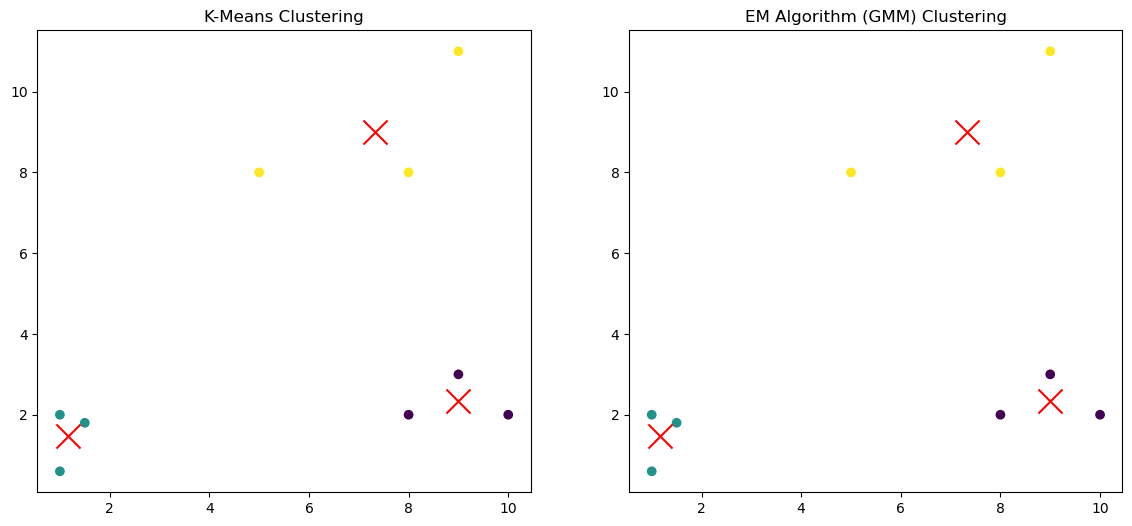

In [7]:
# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Plot GMM by (Expectation Minimization Algorithm)
ax[1].scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis')
ax[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red', marker='x')
ax[1].set_title('EM Algorithm (GMM) Clustering')

# Plot K-Means
ax[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
ax[0].set_title('K-Means Clustering')
plt.show()